In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix

%matplotlib inline

In [4]:
iris_df = pd.read_csv('./Iris.csv')

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [7]:
X = iris_df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [8]:
y_target = iris_df[['Species']]

In [9]:
iris_species = iris_df['Species'].unique()

species_dict = {}
for idx, iris_specie in enumerate(iris_species):
    species_dict[iris_specie] = idx

In [10]:
for iris_specie in iris_species:
    y_target[y_target['Species'] == iris_specie] = species_dict[iris_specie]

C:\Users\Shreya Bhoir\AppData\Local\Temp\ipykernel_13184\4221971137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target[y_target['Species'] == iris_specie] = species_dict[iris_specie]
C:\Users\Shreya Bhoir\AppData\Local\Temp\ipykernel_13184\4221971137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target[y_target['Species'] == iris_specie] = species_dict[iris_specie]


In [11]:
y_target_species = y_target['Species'].values
y_target_formatted = np.array(list(y_target_species), dtype=np.int64)

In [12]:
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
X.values[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [14]:
def k_means(X, K):
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    while True:
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [15]:
X_mat = X.values
K_clusters = 3

In [16]:
centroids, labels, centroids_history, labels_history = k_means(X_mat, K_clusters)

In [17]:
def get_confusion_matrix(y_target_in, labels_in):
    conf_mat = confusion_matrix(y_target_in, labels_in)
    conf_mat_df = pd.DataFrame(conf_mat, index=iris_species, columns=iris_species)
    
    plt.figure(figsize=(5.5,4))
    plt.title('Confusion Matrix for Iris Data')
    plt.imshow(conf_mat_df, cmap='hot', interpolation='nearest')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return conf_mat_df

In [18]:
calculated_accuracy_score = accuracy_score(y_target_formatted, labels)
print(calculated_accuracy_score)

0.32


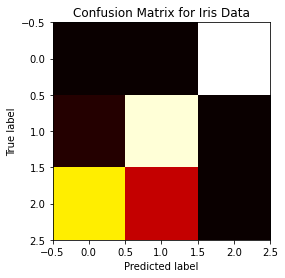

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,0,0,50
Iris-versicolor,2,48,0
Iris-virginica,36,14,0


In [19]:
conf_mat_df = get_confusion_matrix(y_target_formatted, labels)
conf_mat_df

In [20]:
y_target_formatted = np.array(list(y_target_species), dtype=np.int64)

In [ ]:
accuracy_dict = {}
accuracy_score_list = []

for i in range(55):
    print(f'Iteration_a_count: {i}')
    centroids, labels, centroids_history, labels_history = k_means(X_mat, K_clusters)

    calculated_accuracy_score = accuracy_score(y_target_formatted, labels)
    dict_data = {
        'accuracy_score_calculated': calculated_accuracy_score,
        'centroids': centroids
    }
    accuracy_dict[i] = dict_data
    accuracy_score_list.append(calculated_accuracy_score)

Iteration_a_count: 0
Iteration_a_count: 1
Iteration_a_count: 2
Iteration_a_count: 3
Iteration_a_count: 4
Iteration_a_count: 5
Iteration_a_count: 6
Iteration_a_count: 7
Iteration_a_count: 8
Iteration_a_count: 9
Iteration_a_count: 10
Iteration_a_count: 11
Iteration_a_count: 12
Iteration_a_count: 13
Iteration_a_count: 14
Iteration_a_count: 15
Iteration_a_count: 16
Iteration_a_count: 17
Iteration_a_count: 18
Iteration_a_count: 19
Iteration_a_count: 20
Iteration_a_count: 21
Iteration_a_count: 22
Iteration_a_count: 23
Iteration_a_count: 24
Iteration_a_count: 25
Iteration_a_count: 26
Iteration_a_count: 27
Iteration_a_count: 28
Iteration_a_count: 29
Iteration_a_count: 30
Iteration_a_count: 31
Iteration_a_count: 32
Iteration_a_count: 33
Iteration_a_count: 34
Iteration_a_count: 35
Iteration_a_count: 36
Iteration_a_count: 37
Iteration_a_count: 38
Iteration_a_count: 39
Iteration_a_count: 40
Iteration_a_count: 41
Iteration_a_count: 42
Iteration_a_count: 43
Iteration_a_count: 44
Iteration_a_count: 4

C:\Users\Shreya Bhoir\AppData\Local\Temp\ipykernel_13184\1558317132.py:11: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0)
C:\Users\Shreya Bhoir\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
max_accuracy_score = max([val['accuracy_score_calculated'] for key,val in accuracy_dict.items()])

In [ ]:
max_accuracy_score

In [ ]:
k = [k for k,v in accuracy_dict.items() if v['accuracy_score_calculated'] == max_accuracy_score]

In [ ]:
best_centroid = accuracy_dict[k[0]]['centroids']

In [ ]:
best_centroid

In [ ]:
x_data = range(0, len(accuracy_score_list))
plt.scatter(x_data, accuracy_score_list, alpha=0.5)
plt.title('Accuracy over the number of runs')
plt.xlabel('Number of Runs')
plt.ylabel('Accuracy')
plt.show()

Reference:

https://www.youtube.com/watch?v=vtuH4VRq1AU&t=1401s